In [1]:
#!/usr/bin/env python3

import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings
import pandas as pd
# from amazon_scraping.spiders.acquisitions import AcquisitionsSpider

# used just for human readable json
import json
import re

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
stop = stopwords.words('english')

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline


In [2]:
scrapy_settings = get_project_settings()
# modify scrapy_settings here if needed

output = {
          "acquisitions": {},
          "competitors": {}
         }
process = CrawlerProcess(settings=scrapy_settings)
process.crawl("acquisitions", output=output)
process.crawl("competitors", output=output)
process.start()


Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
n
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/bond/stanfordnlp_

2019-11-16 13:42:50 [scrapy.utils.log] INFO: Scrapy 1.8.0 started (bot: amazon_scraping)
2019-11-16 13:42:50 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.7.0, Python 3.7.4 (default, Aug 13 2019, 15:17:50) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Darwin-19.0.0-x86_64-i386-64bit
2019-11-16 13:42:50 [scrapy.crawler] INFO: Overridden settings: {'BOT_NAME': 'amazon_scraping', 'NEWSPIDER_MODULE': 'amazon_scraping.spiders', 'ROBOTSTXT_OBEY': True, 'SPIDER_MODULES': ['amazon_scraping.spiders']}
2019-11-16 13:42:50 [scrapy.extensions.telnet] INFO: Telnet Password: 07b027eb8e3cf946
2019-11-16 13:42:50 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']


Done loading processors!
---


2019-11-16 13:42:50 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.robotstxt.RobotsTxtMiddleware',
 'scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddleware',
 'scrapy.downloadermiddlewares.httpproxy.HttpProxyMiddleware',
 'scrapy.downloadermiddlewares.stats.DownloaderStats']
2019-11-16 13:42:50 [scrapy.middleware] INFO: Enabled spider middlewares:
['scrapy.spidermiddlewares.httperror.HttpErrorMiddleware',
 'scrapy.spidermiddlew

['874', '60']


2019-11-16 13:42:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Woot> (referer: https://en.wikipedia.org/wiki/List_of_mergers_and_acquisitions_by_Amazon)
2019-11-16 13:42:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Whole_Foods_Market> (referer: https://en.wikipedia.org/wiki/List_of_mergers_and_acquisitions_by_Amazon)
2019-11-16 13:42:52 [scrapy.core.engine] INFO: Closing spider (finished)
2019-11-16 13:42:52 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 1872,
 'downloader/request_count': 5,
 'downloader/request_method_count/GET': 5,
 'downloader/response_bytes': 218235,
 'downloader/response_count': 5,
 'downloader/response_status_count/200': 5,
 'elapsed_time_seconds': 1.359528,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2019, 11, 16, 21, 42, 52, 130557),
 'log_count/DEBUG': 9,
 'log_count/INFO': 22,
 'memusage/max': 811806720,
 'memusage/startup': 811806720,
 

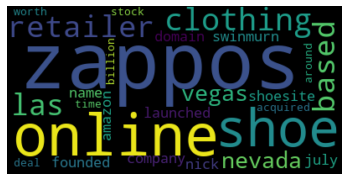

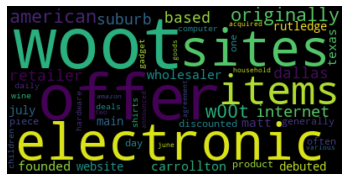

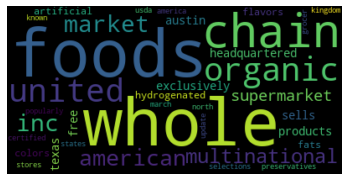

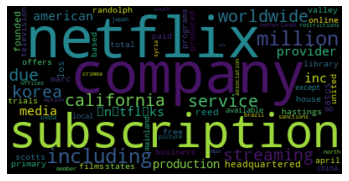

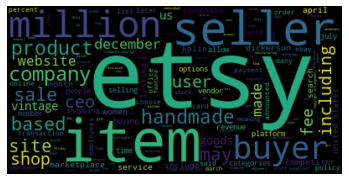

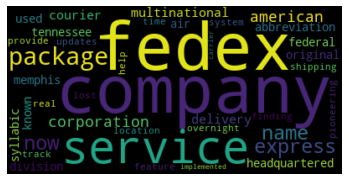

In [3]:
bad_char = ["[1]", '[2]', '[3]', '[4]', '[5]']
text = {}

if not os.path.exists('Figures'):
    os.mkdir('Figures')

for j in output:
    for i in output[j]:
        text[i] = output[j][i]['summary'].strip('\n').lower()
        wordcloud = WordCloud().generate(text[i])

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
    
        plt.savefig(os.path.join('Figures','{}_cloud.jpg'.format(i)), dpi=500)
        plt.show()

In [10]:
text_e = output["competitors"]['Netflix']['summary'].strip('\n').lower()

bad_char = ["[1]", '[2]', '[3]', '[4]', '[5]', ',', '.', '[', ']']

for cha in bad_char:
    text_e = text_e.replace(cha,'')

word_tokens = word_tokenize(text_e) 
  
filtered_sentence = [w for w in word_tokens if not w in stop] 

print(filtered_sentence)


['netflix', 'inc', '(', '/ˈnɛtflɪks/', ')', 'american', 'media-services', 'provider', 'production', 'company', 'headquartered', 'los', 'gatos', 'california', 'founded', '1997', 'reed', 'hastings', 'marc', 'randolph', 'scotts', 'valley', 'california', 'company', "'s", 'primary', 'business', 'subscription-based', 'streaming', 'service', 'offers', 'online', 'streaming', 'library', 'films', 'television', 'programs', 'including', 'produced', 'in-house9', 'april', '2019', 'netflix', '148', 'million', 'paid', 'subscriptions', 'worldwide', 'including', '60', 'million', 'united', 'states', '154', 'million', 'subscriptions', 'total', 'including', 'free', 'trials8', 'available', 'worldwide', 'except', 'mainland', 'china', '(', 'due', 'local', 'restrictions', ')', 'syria', 'north', 'korea', 'crimea', '(', 'due', 'us', 'sanctions', ')', 'company', 'also', 'offices', 'netherlands', 'brazil', 'india', 'japan', 'south', 'korea10', 'netflix', 'member', 'motion', 'picture', 'association', '(', 'mpa', ')

In [74]:
text_e

"netflix inc (/ˈnɛtflɪks/) is an american media-services provider and production company headquartered in los gatos california founded in 1997 by reed hastings and marc randolph in scotts valley california the company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs including those produced in-house9 as of april 2019 netflix had over 148 million paid subscriptions worldwide including 60\xa0million in the united states and over 154\xa0million subscriptions total including free trials8 it is available worldwide except in mainland china (due to local restrictions) syria north korea and crimea (due to us sanctions) the company also has offices in the netherlands brazil india japan and south korea10 netflix is a member of the motion picture association (mpa)"

In [17]:
import stanfordnlp
stanfordnlp.download('en')


Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /Users/bond/stanfordnlp_resources
Hit enter to continue or type an alternate directory.



2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): nlp.stanford.edu:80
2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: http://nlp.stanford.edu:80 "GET /software/stanfordnlp_models/latest/en_ewt_models.zip HTTP/1.1" 302 343
2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nlp.stanford.edu:443
2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: https://nlp.stanford.edu:443 "GET /software/stanfordnlp_models/latest/en_ewt_models.zip HTTP/1.1" 301 363
2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: Resetting dropped connection: nlp.stanford.edu



Download location: /Users/bond/stanfordnlp_resources/en_ewt_models.zip


2019-11-16 11:03:05 [urllib3.connectionpool] DEBUG: https://nlp.stanford.edu:443 "GET /software/stanfordnlp_models/latest/en_ewt_models.zip/ HTTP/1.1" 200 234898212
100%|██████████| 235M/235M [00:40<00:00, 5.83MB/s] 



Download complete.  Models saved to: /Users/bond/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.


In [56]:
nlp = stanfordnlp.Pipeline()#processors = "tokenize,mwt,lemma,pos")


Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pr

In [78]:
import spacy
from spacy import displacy
from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [79]:
doc = nlp(text_e)

2019-11-16 11:56:57 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



In [80]:
print([(X.text, X.label_) for X in doc.ents])

AttributeError: 'Document' object has no attribute 'ents'

In [58]:
#dictionary that contains pos tags and their explanations
pos_dict = {
'CC': 'coordinating conjunction','CD': 'cardinal digit','DT': 'determiner',
'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
'FW': 'foreign word','IN':  'preposition/subordinating conjunction','JJ': 'adjective \'big\'',
'JJR': 'adjective, comparative \'bigger\'','JJS': 'adjective, superlative \'biggest\'',
'LS': 'list marker 1)','MD': 'modal could, will','NN': 'noun, singular \'desk\'',
'NNS': 'noun plural \'desks\'','NNP': 'proper noun, singular \'Harrison\'',
'NNPS': 'proper noun, plural \'Americans\'','PDT': 'predeterminer \'all the kids\'',
'POS': 'possessive ending parent\'s','PRP': 'personal pronoun I, he, she',
'PRP$': 'possessive pronoun my, his, hers','RB': 'adverb very, silently,',
'RBR': 'adverb, comparative better','RBS': 'adverb, superlative best',
'RP': 'particle give up','TO': 'to go \'to\' the store.','UH': 'interjection errrrrrrrm',
'VB': 'verb, base form take','VBD': 'verb, past tense took',
'VBG': 'verb, gerund/present participle taking','VBN': 'verb, past participle taken',
'VBP': 'verb, sing. present, non-3d take','VBZ': 'verb, 3rd person sing. present takes',
'WDT': 'wh-determiner which','WP': 'wh-pronoun who, what','WP$': 'possessive wh-pronoun whose',
'WRB': 'wh-abverb where, when','QF' : 'quantifier, bahut, thoda, kam (Hindi)','VM' : 'main verb',
'PSP' : 'postposition, common in indian langs','DEM' : 'demonstrative, common in indian langs'
}

In [59]:
#extract parts of speech
def extract_pos(doc):
    parsed_text = {'word':[], 'pos':[], 'exp':[]}
    for sent in doc.sentences:
        for wrd in sent.words:
            if wrd.pos in pos_dict.keys():
                pos_exp = pos_dict[wrd.pos]
            else:
                pos_exp = 'NA'
            parsed_text['word'].append(wrd.text)
            parsed_text['pos'].append(wrd.pos)
            parsed_text['exp'].append(pos_exp)
    #return a dataframe of pos and text
    return pd.DataFrame(parsed_text)

#extract pos
pos_df = extract_pos(doc)

In [73]:
pos_df[pos_df['pos'] == 'NN']

,word,pos,exp
0,netflix,NN,"noun, singular 'desk'"
10,media-,NN,"noun, singular 'desk'"
12,provider,NN,"noun, singular 'desk'"
14,production,NN,"noun, singular 'desk'"
15,company,NN,"noun, singular 'desk'"
32,valley,NN,"noun, singular 'desk'"
35,company,NN,"noun, singular 'desk'"
38,business,NN,"noun, singular 'desk'"
41,subscription,NN,"noun, singular 'desk'"
44,streaming,NN,"noun, singular 'desk'"


In [61]:
doc.sentences[0].print_dependencies()

('netflix', '2', 'compound')
('inc', '16', 'nsubj')
('(', '2', 'punct')
('/', '5', 'punct')
('ˈnɛtflɪks', '2', 'appos')
('/', '5', 'punct')
(')', '5', 'punct')
('is', '16', 'cop')
('an', '16', 'det')
('american', '16', 'amod')
('media-', '12', 'compound')
('services', '13', 'compound')
('provider', '16', 'compound')
('and', '15', 'cc')
('production', '13', 'conj')
('company', '0', 'root')
('headquartered', '16', 'acl')
('in', '21', 'case')
('los', '21', 'compound')
('gatos', '21', 'compound')
('california', '17', 'obl')
('founded', '17', 'xcomp')
('in', '24', 'case')
('1997', '22', 'obl')
('by', '26', 'case')
('reed', '22', 'obl')
('hastings', '26', 'flat')
('and', '29', 'cc')
('marc', '27', 'conj')
('randolph', '29', 'flat')
('in', '33', 'case')
('scotts', '33', 'compound')
('valley', '29', 'nmod')
('california', '33', 'appos')
('the', '36', 'det')
('company', '39', 'nmod:poss')
("'s", '36', 'case')
('primary', '39', 'amod')
('business', '34', 'appos')
('is', '46', 'cop')
('its', '46'

In [62]:
pos_df.head(50)

,word,pos,exp
0,netflix,NN,"noun, singular 'desk'"
1,inc,NNP,"proper noun, singular 'Harrison'"
2,(,-LRB-,NA
3,/,",",NA
4,ˈnɛtflɪks,NNS,noun plural 'desks'
5,/,",",NA
6,),-RRB-,NA
7,is,VBZ,"verb, 3rd person sing. present takes"
8,an,DT,determiner
9,american,JJ,adjective 'big'


In [5]:
pos_dict = {'CC': 'coordinating conjunction', 'CD': 'cardinal digit', 'DT': 'determiner',
                'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
                'FW': 'foreign word', 'IN': 'preposition/subordinating conjunction', 'JJ': 'adjective \'big\'',
                'JJR': 'adjective, comparative \'bigger\'', 'JJS': 'adjective, superlative \'biggest\'',
                'LS': 'list marker 1)', 'MD': 'modal could, will', 'NN': 'noun, singular \'desk\'',
                'NNS': 'noun plural \'desks\'', 'NNP': 'proper noun, singular \'Harrison\'',
                'NNPS': 'proper noun, plural \'Americans\'', 'PDT': 'predeterminer \'all the kids\'',
                'POS': 'possessive ending parent\'s', 'PRP': 'personal pronoun I, he, she',
                'PRP$': 'possessive pronoun my, his, hers', 'RB': 'adverb very, silently,',
                'RBR': 'adverb, comparative better', 'RBS': 'adverb, superlative best',
                'RP': 'particle give up', 'TO': 'to go \'to\' the store.', 'UH': 'interjection errrrrrrrm',
                'VB': 'verb, base form take', 'VBD': 'verb, past tense took',
                'VBG': 'verb, gerund/present participle taking', 'VBN': 'verb, past participle taken',
                'VBP': 'verb, sing. present, non-3d take', 'VBZ': 'verb, 3rd person sing. present takes',
                'WDT': 'wh-determiner which', 'WP': 'wh-pronoun who, what', 'WP$': 'possessive wh-pronoun whose',
                'WRB': 'wh-abverb where, when', 'QF': 'quantifier, bahut, thoda, kam (Hindi)', 'VM': 'main verb',
                'PSP': 'postposition, common in indian langs', 'DEM': 'demonstrative, common in indian langs'
                }

    # extract parts of speech
def extract_pos(doc):
    parsed_text = {'word': [], 'pos': [], 'exp': []}
    for sent in doc.sentences:
        for wrd in sent.words:
            if wrd.pos in pos_dict.keys():
                pos_exp = pos_dict[wrd.pos]
            else:
                pos_exp = 'NA'
            parsed_text['word'].append(wrd.text)
            parsed_text['pos'].append(wrd.pos)
            parsed_text['exp'].append(pos_exp)
    # return a dataframe of pos and text
    return pd.DataFrame(parsed_text)

In [8]:
import pandas as pd
import stanfordnlp
stanfordnlp.download('en')
nlp = stanfordnlp.Pipeline()

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
n
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/bond/stanfordnlp_

In [49]:
NN_df = {}
for j in output:
    for i in output[j]:
        text_e = output[j][i]['summary'].strip('\n').lower()
        doc = nlp(text_e)
        #extract pos
        pos_df = extract_pos(doc)

        NN_df[i] = pos_df[pos_df['pos'] == 'NNP']
        print(NN_df[i])
#         for row in NN_df[i]:
#             if row in output[j][i]['founder']:
#                 NN_df[i].drop(row, axis=0, inplace=True)

2019-11-16 14:01:45 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



      word  pos                               exp
10     las  NNP  proper noun, singular 'Harrison'
11   vegas  NNP  proper noun, singular 'Harrison'
13  nevada  NNP  proper noun, singular 'Harrison'
25    nick  NNP  proper noun, singular 'Harrison'
36    july  NNP  proper noun, singular 'Harrison'
39  amazon  NNP  proper noun, singular 'Harrison'
41  zappos  NNP  proper noun, singular 'Harrison'


2019-11-16 14:01:45 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



           word  pos                               exp
13       dallas  NNP  proper noun, singular 'Harrison'
16   carrollton  NNP  proper noun, singular 'Harrison'
18        texas  NNP  proper noun, singular 'Harrison'
24         matt  NNP  proper noun, singular 'Harrison'
25     rutledge  NNP  proper noun, singular 'Harrison'
30         july  NNP  proper noun, singular 'Harrison'
38         woot  NNP  proper noun, singular 'Harrison'
88         june  NNP  proper noun, singular 'Harrison'
93         woot  NNP  proper noun, singular 'Harrison'
101      amazon  NNP  proper noun, singular 'Harrison'


2019-11-16 14:01:46 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



       word  pos                               exp
3      inc.  NNP  proper noun, singular 'Harrison'
12   austin  NNP  proper noun, singular 'Harrison'
14    texas  NNP  proper noun, singular 'Harrison'
43   united  NNP  proper noun, singular 'Harrison'
44   states  NNP  proper noun, singular 'Harrison'
66  america  NNP  proper noun, singular 'Harrison'
73    march  NNP  proper noun, singular 'Harrison'


2019-11-16 14:01:46 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



           word  pos                               exp
2          inc.  NNP  proper noun, singular 'Harrison'
20          los  NNP  proper noun, singular 'Harrison'
21        gatos  NNP  proper noun, singular 'Harrison'
23   california  NNP  proper noun, singular 'Harrison'
29         reed  NNP  proper noun, singular 'Harrison'
32         marc  NNP  proper noun, singular 'Harrison'
33     randolph  NNP  proper noun, singular 'Harrison'
38   california  NNP  proper noun, singular 'Harrison'
77        april  NNP  proper noun, singular 'Harrison'
94       united  NNP  proper noun, singular 'Harrison'
95       states  NNP  proper noun, singular 'Harrison'
117       china  NNP  proper noun, singular 'Harrison'
125       syria  NNP  proper noun, singular 'Harrison'
127       north  NNP  proper noun, singular 'Harrison'
128       korea  NNP  proper noun, singular 'Harrison'
131      crimea  NNP  proper noun, singular 'Harrison'
148      brazil  NNP  proper noun, singular 'Harrison'
150       

2019-11-16 14:02:00 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



           word  pos                               exp
99     december  NNP  proper noun, singular 'Harrison'
303    november  NNP  proper noun, singular 'Harrison'
701      google  NNP  proper noun, singular 'Harrison'
753      united  NNP  proper noun, singular 'Harrison'
754      states  NNP  proper noun, singular 'Harrison'
...         ...  ...                               ...
3212     united  NNP  proper noun, singular 'Harrison'
3213     states  NNP  proper noun, singular 'Harrison'
3382        oct  NNP  proper noun, singular 'Harrison'
3441  dickerson  NNP  proper noun, singular 'Harrison'
3518  september  NNP  proper noun, singular 'Harrison'

[133 rows x 3 columns]


2019-11-16 14:02:04 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



         word  pos                               exp
12    memphis  NNP  proper noun, singular 'Harrison'
14  tennessee  NNP  proper noun, singular 'Harrison'


In [22]:
output['acquisitions']['Woot']['founder'].lower().split()

['matt', 'rutledge']

In [50]:
NN_df['Woot']

,word,pos,exp
13,dallas,NNP,"proper noun, singular 'Harrison'"
16,carrollton,NNP,"proper noun, singular 'Harrison'"
18,texas,NNP,"proper noun, singular 'Harrison'"
24,matt,NNP,"proper noun, singular 'Harrison'"
25,rutledge,NNP,"proper noun, singular 'Harrison'"
30,july,NNP,"proper noun, singular 'Harrison'"
38,woot,NNP,"proper noun, singular 'Harrison'"
88,june,NNP,"proper noun, singular 'Harrison'"
93,woot,NNP,"proper noun, singular 'Harrison'"
101,amazon,NNP,"proper noun, singular 'Harrison'"


In [53]:
for row in NN_df['Woot']['word']:
    NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != 'woot']
    NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != 'amazon']
    if row in output['acquisitions']['Woot']['founder'].lower().split():
        NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != row]
NN_df['Woot']

,word,pos,exp
13,dallas,NNP,"proper noun, singular 'Harrison'"
16,carrollton,NNP,"proper noun, singular 'Harrison'"
18,texas,NNP,"proper noun, singular 'Harrison'"
30,july,NNP,"proper noun, singular 'Harrison'"
88,june,NNP,"proper noun, singular 'Harrison'"


In [34]:
output['acquisitions']['Woot']['founder'].lower().split()

list

In [47]:
NN_df['Woot'].index(NN_df['Woot']['word'] == 'matt')

TypeError: 'Int64Index' object is not callable